<a href="https://colab.research.google.com/github/pallalavanya22/Fmml-labs/blob/main/FMML_2024_Module_5_Lab_1_NL_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Nikunj Nawal
```



## SVMs Recap:

![SVM](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

SVMs are an iterative approach of trying to find the optimal hyperplane that divides the multidimentional space into different classes present in the dataset.


**Hyperplanes:** These are the decision planes that separate the objects of classes that we are trying to classify.

**Support Vectors** : Support vectors are the points from dataset that are closest to the hyperplane that divides the dataset.

**Margin**:  The gap between the closest support vectors from the different class along the direction perpendicular to the hyperplane. Simply put, it is the sum of perpendicular distance of the support vector of each class to the hyperplane.

---

In [1]:
# Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

(100, 2) (100,)


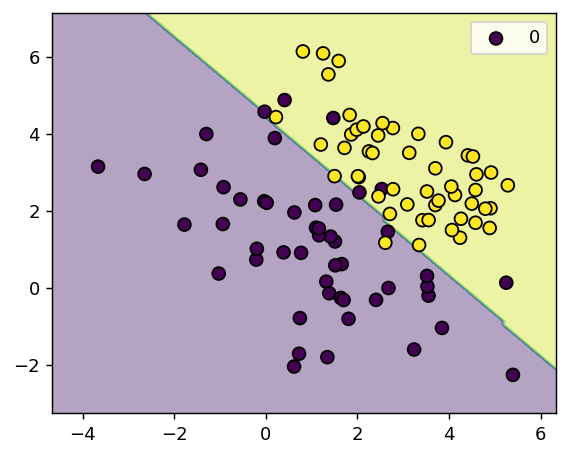

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))
print(X.shape, y.shape)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.legend(["0", "1"])
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


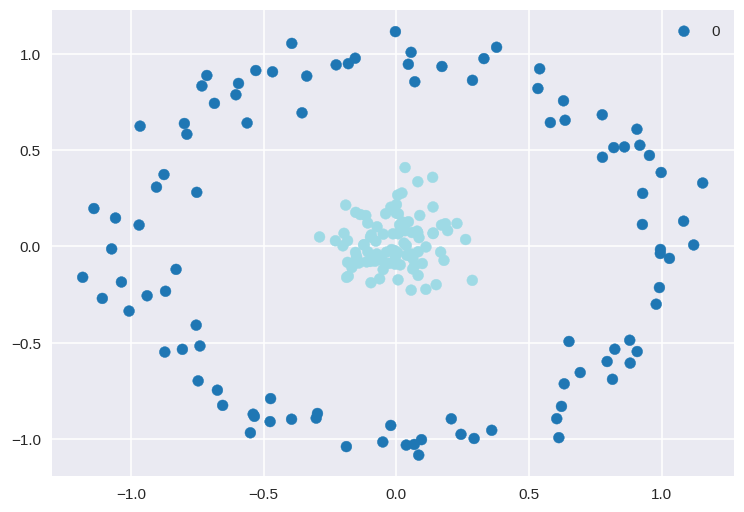

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn-v0_8")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)
plt.legend(["0", "1"])

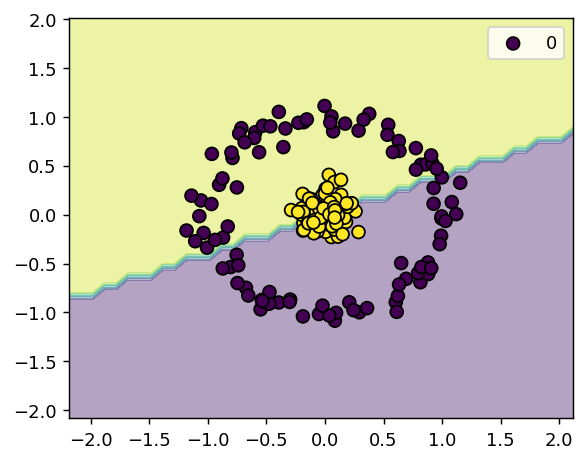

In [4]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [5]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [6]:
X_new = np.hstack((X, Z))

In [7]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

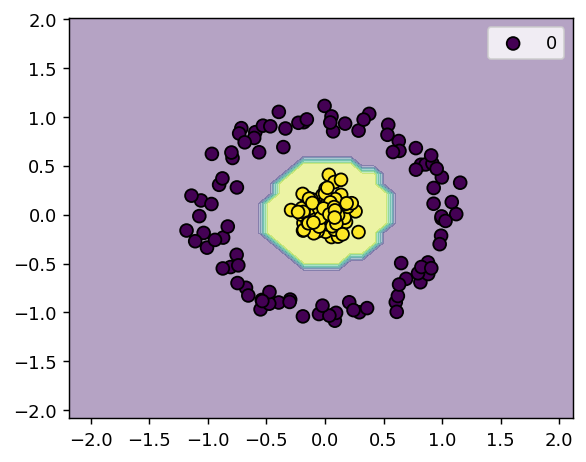

In [8]:
plt.style.use("default")
clf = svm.SVC(kernel='rbf')
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [9]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.


Tasks:

Task-1
Try to run the same experiment after filtering different features, 2 at a time.

ANSWER1....

To run an experiment where two features are removed at a time from a dataset, follow these steps:

1. Understand the Dataset

Identify the features (columns) in your dataset.

List all possible combinations of two features to exclude at a time.


2. Steps to Perform

For each combination of two features:

1. Remove the selected pair of features from the dataset.


2. Train and evaluate your model (e.g., using cross-validation or a holdout set).


3. Record the results (e.g., accuracy, precision, recall, etc.).




3. Implementation in Python

Here’s an example of how to automate this using Python and libraries like pandas, scikit-learn, and itertools:

import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
# Replace this with your dataset loading method
data = pd.read_csv('your_dataset.csv')

# Separate features and target
X = data.drop('target', axis=1)  # Replace 'target' with your target column
y = data['target']

# Get all feature combinations of size 2 to remove
features = X.columns.tolist()
feature_combinations = list(itertools.combinations(features, 2))

results = []

# Loop through each pair of features to exclude
for combo in feature_combinations:
    # Create a new dataset without the selected features
    X_filtered = X.drop(list(combo), axis=1)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)
    
    # Train a model (example: RandomForest)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Save the result
    results.append({'removed_features': combo, 'accuracy': accuracy})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by accuracy to find the most impactful features
sorted_results = results_df.sort_values(by='accuracy', ascending=False)

print(sorted_results)

4. Interpret the Results

Features whose removal leads to a significant drop in accuracy are likely important.

Conversely, features whose removal has little to no impact may be redundant or less important.

Task-2
Use different kinds of kernels for the SVM and plot it for Iris dataset -
1. linear
2. poly
3. rbf
4. sigmoid
5. precomputed

ANSWER2.....

Here's how you can use different kernel types for SVM on the Iris dataset and plot the decision boundaries:

Code Example

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization
y = iris.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Iterate through kernels and plot decision boundaries
for i, kernel in enumerate(kernels):
    # Train the SVM model
    svm = SVC(kernel=kernel, C=1, random_state=42)
    svm.fit(X_train, y_train)
    
    # Plot decision boundary
    ax = axes[i]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_title(f"SVM with {kernel} kernel")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

Explanation of the Code

1. Dataset Preparation:

Used only the first two features of the Iris dataset for 2D visualization.

Standardized the dataset using StandardScaler.



2. SVM Kernels:

Linear: Fits a straight line.

Polynomial (Poly): Fits non-linear decision boundaries using polynomial functions.

RBF (Radial Basis Function): Maps data into higher-dimensional space.

Sigmoid: Similar to a neural network's activation function.



3. Decision Boundaries:

Decision regions are plotted for each kernel.

A color map differentiates classes, and the data points are overlaid.




Results

This visualization helps to understand the behavior of different SVM kernels on the Iris dataset. Would you like help interpreting the plots or modifying the code for a specific analysis?


Learning Tasks:
Learn about SVM types, support vectors and hyperplanes.

ANSWER....

Support Vector Machine (SVM) Overview

Support Vector Machines (SVM) are supervised learning algorithms primarily used for classification and regression tasks. They are particularly effective for high-dimensional spaces and are widely known for their ability to create robust decision boundaries.


---

1. SVM Types

a. Linear SVM

Used for datasets that are linearly separable, meaning the data can be separated by a straight hyperplane.

The goal is to find the hyperplane that maximizes the margin (distance between data points and the decision boundary).


b. Non-Linear SVM

For datasets that cannot be separated linearly, SVM uses the kernel trick to map the data into higher dimensions, making it linearly separable.

Popular kernels include:

Polynomial kernel: Maps data into a polynomial space.

RBF (Radial Basis Function) kernel: Creates circular boundaries in feature space.

Sigmoid kernel: Mimics neural network behavior.



c. SVM for Regression (SVR)

Instead of finding a decision boundary, SVR finds a function that deviates by a maximum margin (epsilon) from the true data points.


d. Multi-Class SVM

SVM is inherently binary, but for multi-class problems, strategies like One-vs-One (OvO) or One-vs-Rest (OvR) are applied.



---

2. Key Concepts

a. Support Vectors

Support vectors are the critical data points closest to the hyperplane.

They directly influence the position and orientation of the hyperplane.

Removing a support vector can alter the decision boundary.


b. Hyperplane

The hyperplane is the decision boundary that separates different classes.

In a 2D space, it's a line; in 3D, it's a plane, and in higher dimensions, it becomes a hyperplane.


c. Margin

The margin is the distance between the hyperplane and the nearest data points (support vectors) from either class.

Optimal Hyperplane: The one that maximizes the margin.



---

3. Mathematical Formulation

Objective of SVM:

Minimize:


\frac{1}{2} ||w||^2

y_i (w \cdot x_i + b) \geq 1 \quad \text{for all } i

: Bias term (offset of the hyperplane).

: Label of the  data point ( or ).

: Feature vector of the  data point.


Slack Variables () for Soft Margin SVM:

Introduced to handle overlap between classes.

Objective becomes:


\min \frac{1}{2} ||w||^2 + C \sum_{i=1}^N \xi_i


---

4. Kernels in SVM

Kernel Trick

Kernels transform non-linearly separable data into a higher-dimensional space where it becomes separable.

Common Kernels:

Linear Kernel: No transformation, works directly in the input space.

Polynomial Kernel: , where  is the degree of the polynomial.

RBF Kernel: , where  controls the influence of each data point.

Sigmoid Kernel: .




---

5. Strengths of SVM

Works well for high-dimensional data.

Effective when the number of dimensions exceeds the number of samples.

Memory-efficient as it uses only the support vectors.



---

6. Weaknesses of SVM

Computationally intensive for large datasets.

Sensitive to the choice of kernel and hyperparameters (e.g., , ).

Not effective when classes overlap significantly.



---

7. Visualization of SVM Concepts

If you'd like, I can generate a plot to visualize support vectors, hyperplanes, and margins in 2D space. Would you like me to proceed?

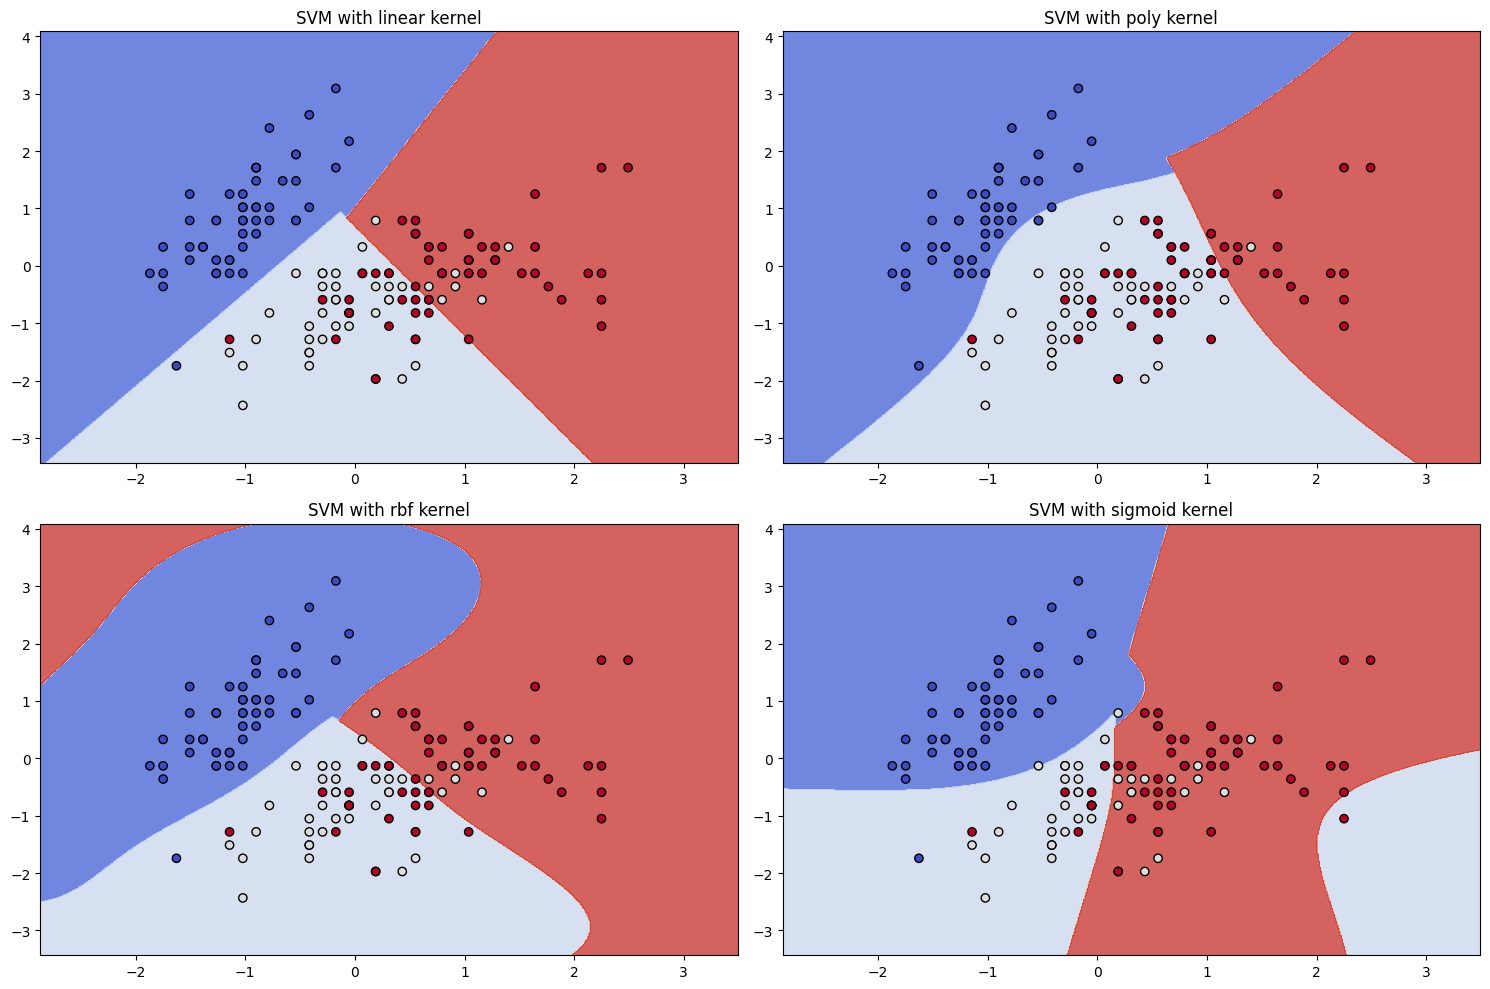

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization
y = iris.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Iterate through kernels and plot decision boundaries
for i, kernel in enumerate(kernels):
    # Train the SVM model
    svm = SVC(kernel=kernel, C=1, random_state=42)
    svm.fit(X_train, y_train)

    # Plot decision boundary
    ax = axes[i]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_title(f"SVM with {kernel} kernel")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()